## What is the most optimal skill to learn for Data Analysis?

#### Methodology

- Group skills to determine median salary and likelihood of being in job postings
- Visualize median salary vs percent skill demand
- (Optional) Determine if certain technologies are more prevalent

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_UAE = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Arab Emirates')].copy()

In [4]:
df_DA_UAE = df_DA_UAE.dropna(subset= ['salary_year_avg'])

df_DA_UAE_exploded = df_DA_UAE.explode('job_skills')

df_DA_UAE_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
55758,72000.0,sql
55758,72000.0,python
55758,72000.0,aws
55758,72000.0,power bi
55758,72000.0,tableau


In [9]:
df_DA_skills = df_DA_UAE_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_UAE)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,5,98500.0,21.739130
tableau,4,88850.0,17.391304
python,4,88850.0,17.391304
r,3,98500.0,13.043478
power bi,3,98500.0,13.043478
aws,1,72000.0,4.347826
powerpoint,1,72000.0,4.347826
excel,1,72000.0,4.347826
looker,1,98500.0,4.347826


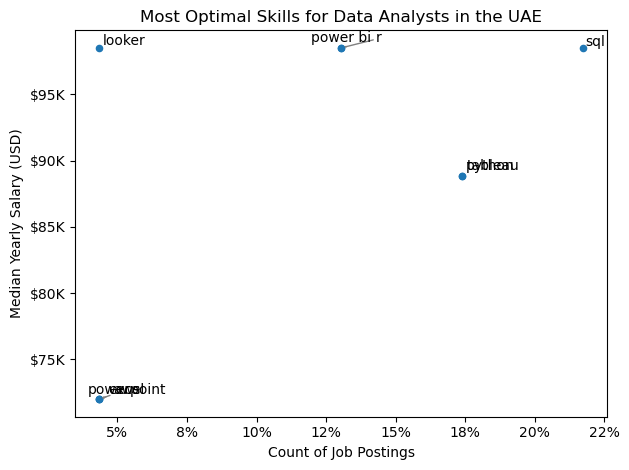

In [12]:
from adjustText import adjust_text

df_DA_skills.plot(kind='scatter', x= 'skill_percent', y= 'median_salary')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills.index):
    texts.append(plt.text(df_DA_skills['skill_percent'].iloc[i], df_DA_skills['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1)) #lw means line width

# Set axis labels, title, and legend
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Most Optimal Skills for Data Analysts in the UAE')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Adjust layout and display plot
plt.tight_layout()
plt.show()

In [13]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set them back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['esquisse',
  'sheets',
  'powerbi',
  'spss',
  'word',
  'sharepoint',
  'msaccess',
  'datarobot',
  'power bi',
  'ssrs',
  'spreadsheet',
  'nuix',
  'alteryx',
  'qlik',
  'sap',
  'splunk',
  'ms access',
  'powerpoint',
  'sas',
  'dax',
  'visio',
  'ssis',
  'tableau',
  'looker',
  'microstrategy',
  'excel',
  'cognos',
  'outlook'],
 'programming': ['perl',
  'python',
  't-sql',
  'julia',
  'bash',
  'matlab',
  'vb.net',
  'vba',
  'nosql',
  'html',
  'pascal',
  'css',
  'no-sql',
  'mongo',
  'rust',
  'objective-c',
  'go',
  'typescript',
  'visualbasic',
  'javascript',
  'c++',
  'ocaml',
  'groovy',
  'php',
  'erlang',
  'solidity',
  'elixir',
  'clojure',
  'sql',
  'dart',
  'f#',
  'haskell',
  'c',
  'shell',
  'r',
  'lua',
  'scala',
  'sas',
  'ruby',
  'lisp',
  'powershell',
  'mongodb',
  'c#',
  'fortran',
  'cobol',
  'visual basic',
  'apl',
  'java',
  'delphi',
  'kotlin',
  'golang',
  'swift',
  'assembly',
  'crystal',
  's

In [15]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,esquisse
0,analyst_tools,sheets
0,analyst_tools,powerbi
0,analyst_tools,spss
0,analyst_tools,word
...,...,...
9,sync,ringcentral
9,sync,google chat
9,sync,twilio
9,sync,slack


In [18]:
df_plot = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,5,98500.0,21.739130,programming,sql
1,4,88850.0,17.391304,analyst_tools,tableau
2,4,88850.0,17.391304,programming,python
3,3,98500.0,13.043478,programming,r
4,3,98500.0,13.043478,analyst_tools,power bi
5,1,72000.0,4.347826,cloud,aws
6,1,72000.0,4.347826,analyst_tools,powerpoint
7,1,72000.0,4.347826,analyst_tools,excel
8,1,98500.0,4.347826,analyst_tools,looker


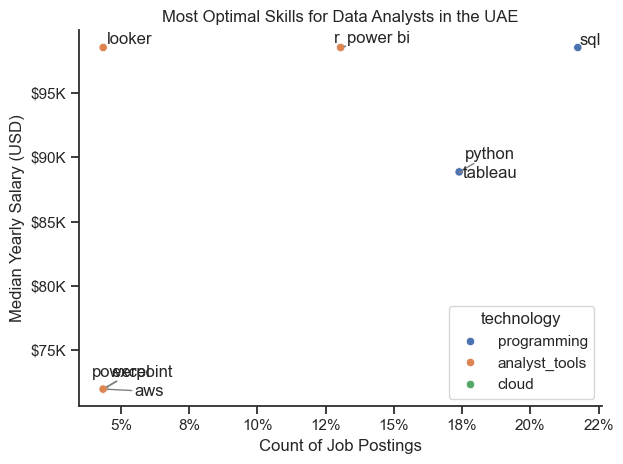

In [35]:
from adjustText import adjust_text

#df_plot.plot(kind='scatter', x= 'skill_percent', y= 'median_salary')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills.index):
    texts.append(plt.text(df_DA_skills['skill_percent'].iloc[i], df_DA_skills['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1)) #lw means line width

# Set axis labels, title, and legend
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Most Optimal Skills for Data Analysts in the UAE')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Adjust layout and display plot
plt.tight_layout()
plt.show()